In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [3]:
# Loading the dataset
data=pd.read_csv("C:/Users/pc/OneDrive/Desktop/creditcard.csv")

In [12]:
# displaying the top five records
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# displaying the bottom five records
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
# Repesentation the number of dimensions
data.ndim

2

In [15]:
#shape of data
data.shape

(284807, 31)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [19]:
data.isnull().sum

<bound method DataFrame.sum of          Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        

In [20]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


In [21]:
X=data.iloc[-8:,8:14]
print(X)

              V8        V9       V10       V11       V12       V13
284799  2.080825  1.159498 -0.594242 -1.264072  0.453596 -0.243142
284800 -0.118228  0.435402  0.267772  0.523316  0.559047 -0.834660
284801  0.115093 -0.204064 -0.657422  0.644837  0.190916 -0.546329
284802  7.305334  1.914428  4.356170 -1.593105  2.711941 -0.689256
284803  0.294869  0.584800 -0.975926 -0.150189  0.915802  1.214756
284804  0.708417  0.432454 -0.484782  0.411614  0.063119 -0.183699
284805  0.679145  0.392087 -0.399126 -1.933849 -0.962886 -1.042082
284806 -0.414650  0.486180 -0.915427 -1.040458 -0.031513 -0.188093


In [22]:
Y=data.iloc[2:,-1]
print(Y)

2         0
3         0
4         0
5         0
6         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284805, dtype: int64


In [24]:
fraud = data[data['Class'] == 1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [25]:
legit = data[data['Class'] == 0]
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


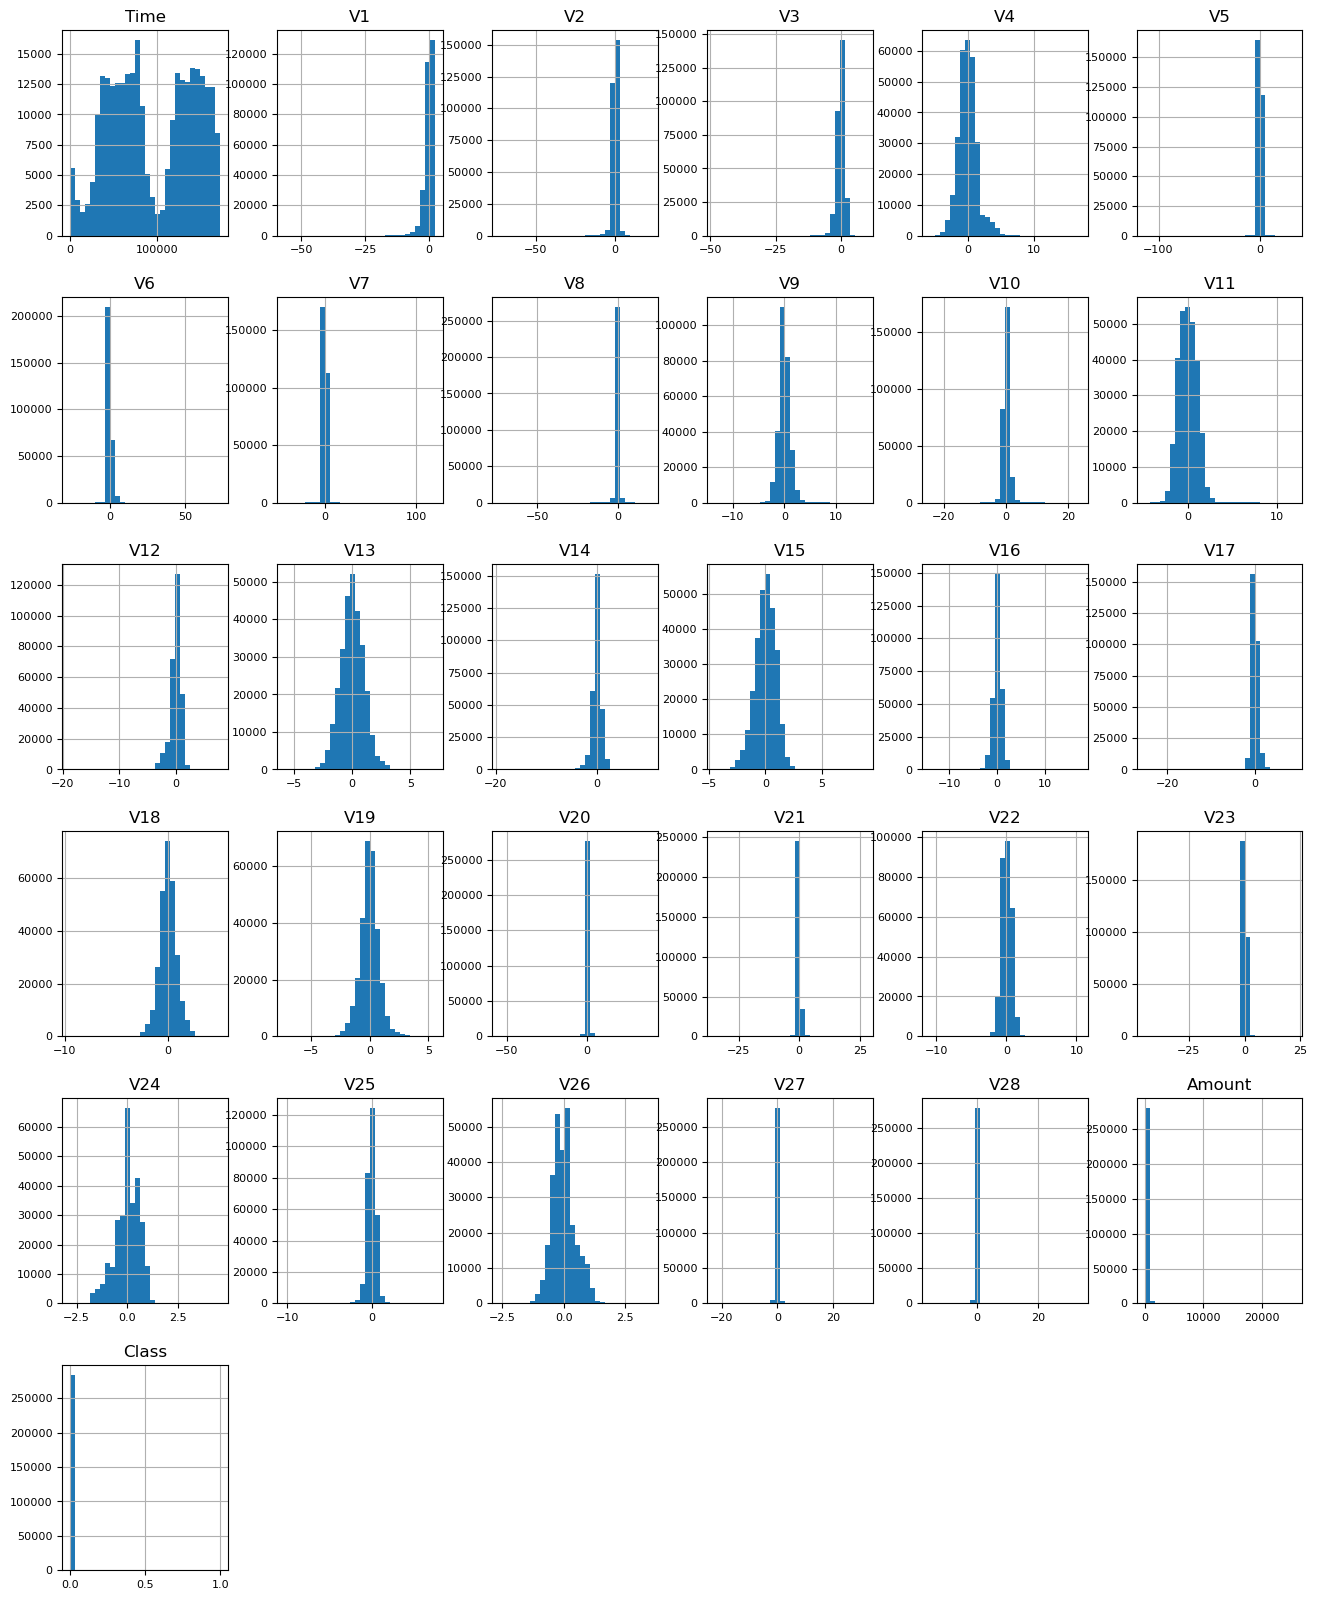

In [26]:
data.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8);

<Axes: ylabel='count'>

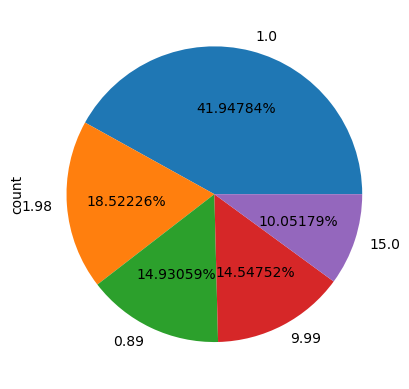

In [6]:
data['Amount'].value_counts().head().plot(kind = 'pie',autopct = '%5.5f%%')

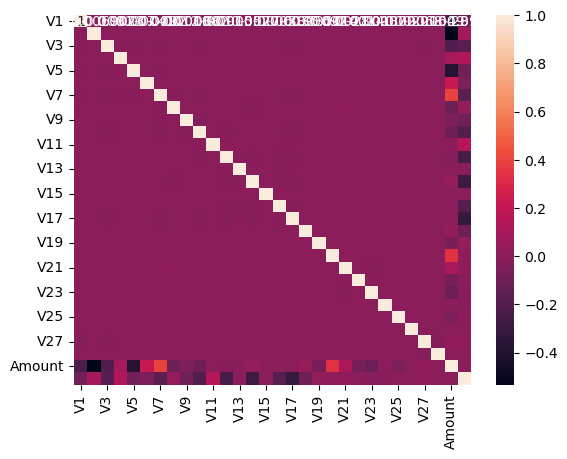

In [85]:
sns.heatmap(data.corr(),annot=True)
plt.show()

<Axes: ylabel='count'>

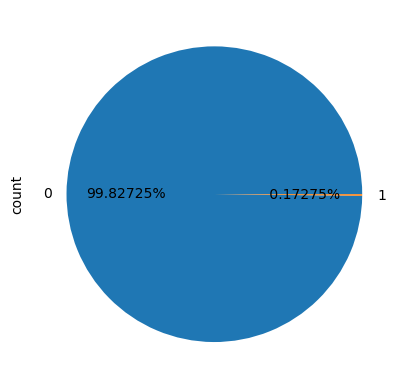

In [7]:
data['Class'].value_counts().head().plot(kind = 'pie',autopct = '%8.5f%%')

<Axes: ylabel='Frequency'>

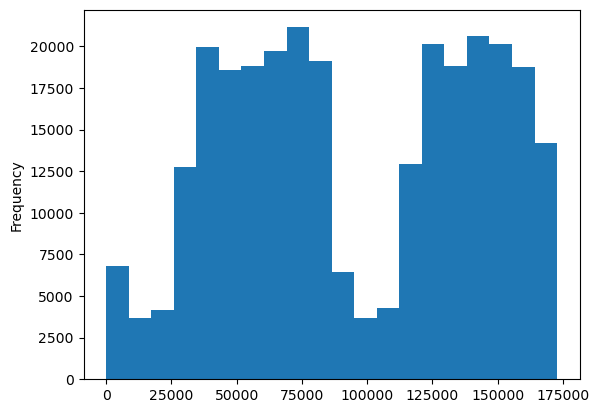

In [8]:
data['Time'].plot.hist(bins=20)

In [27]:
# dropna() is funtion which remove null values
data.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# standardscalar()-This function is used to standardize the data values into a standard format...

In [30]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
data['Amount']=Sc.fit_transform(pd.DataFrame(data['Amount']))

In [31]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [32]:
data.shape

(284807, 31)

In [33]:
# checking whether duplicate values are present
data.duplicated().any()

True

In [34]:
# Removing duplicate values
data=data.drop_duplicates()

In [35]:
# after removing duplicates 
# 284807-orginal transactions    283726- after deleting duplicate transactions
data.shape

(283726, 31)

In [36]:
data=data.drop(['Time'],axis=1)

In [37]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [40]:
x=data.drop('Class',axis=1)
y=data["Class"]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [43]:
from sklearn.linear_model import LogisticRegression

In [46]:
model=LogisticRegression()

In [47]:
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
x_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
11788,1.228656,-0.295896,1.033580,-0.509189,-1.177713,-0.782769,-0.674604,-0.096813,3.157907,-1.445210,...,-0.169305,-0.160255,-0.006175,-0.029218,0.339494,0.461218,-0.725189,0.062584,0.030026,-0.305852
197573,1.863763,-0.636954,0.135115,0.419048,-1.134366,-0.252548,-0.958368,0.208787,1.436902,0.011878,...,-0.217100,0.139816,0.463858,0.257995,0.042381,-0.470785,-0.434379,0.044071,-0.032763,-0.228649
85547,1.335053,0.331464,-2.057763,-0.346175,2.583234,2.854102,-0.187547,0.685154,-0.286614,-0.535903,...,0.045217,-0.191820,-0.650118,-0.114069,0.915936,0.730073,0.383879,-0.031902,0.029849,-0.350191
210287,1.872132,-1.973170,-1.043771,-1.400795,-1.523283,-0.676537,-0.844691,-0.194710,-1.516951,1.654773,...,-0.058913,0.009935,0.093027,0.066192,0.009629,-0.296703,-0.200713,-0.028136,-0.027936,0.472895
8448,1.178552,-0.362408,0.475223,0.249700,-0.695530,-0.240495,-0.490858,0.058848,2.127048,-0.519596,...,-0.169612,-0.238490,-0.398782,-0.106702,-0.015077,0.354622,1.079675,-0.117203,-0.018537,-0.194905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259016,-0.671056,0.792590,2.099199,-0.417980,0.139851,-0.332460,0.498079,-0.000907,-0.049206,-1.043295,...,0.069499,-0.169573,-0.413624,-0.281089,-0.117866,0.357810,-0.412527,0.080373,0.076848,-0.343274
168175,-3.432679,-1.376964,1.871603,0.013307,1.354487,-0.321253,-0.656465,0.083131,1.845942,0.587300,...,-0.179545,-0.663685,-0.527410,-0.570266,0.683886,0.576868,0.245672,0.290621,0.894821,-0.062968
127840,-1.778757,-1.007037,2.212395,2.001382,-1.409393,2.052972,2.189464,0.037459,0.009974,-0.757087,...,1.232254,0.323592,0.341971,0.809354,-0.478557,0.915300,0.146381,-0.293891,-0.114728,2.010119
49533,-0.693041,0.764389,1.998056,0.100377,-1.137246,-0.365349,-0.433140,0.577989,0.060847,-0.738223,...,-0.126354,0.397569,1.008474,-0.010437,0.410138,-0.668195,0.361616,0.034253,0.112028,-0.258875


In [49]:
y_train

11788     0
197573    0
85547     0
210287    0
8448      0
         ..
259016    0
168175    0
127840    0
49533     0
82158     0
Name: Class, Length: 226980, dtype: int64

In [52]:
y_predic=model.predict(x_test)

In [55]:
y_predic

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
pred=print(model.predict(x_test))

[0 0 0 ... 0 0 0]


In [58]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=150,random_state=52)

In [59]:
rfm.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=52)

In [60]:
y_pred_data_rfm=model.predict(x_train)

In [62]:
# machice learing classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
l=knn_clf.predict(x_train[1:15])
print(l)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [67]:
l=knn_clf.score(x_test,y_test)
print(l)

0.9994008388256441


In [78]:
# checking the performance of regression model

In [79]:
# MEAN SQUARED ERROR (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test , y_predic)
mse

0.0008634969865717407

In [80]:
# MEAN ABSOLUTE ERROR (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test , y_predic)
mae

0.0008634969865717407

In [81]:
# ROOT MEAN SQUARED ERROR (RMSE) 
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predic)
r2

0.3941969970794348

In [82]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

In [83]:
accuracy_score(y_test,y_predic)

0.9991365030134283

In [84]:
f1_score(y_test,y_predic)

0.6666666666666666